# Predict medical expenses using linear regression

Data Info -
#age: An integer indicating the age of the primary beneficiary
#sex: The policy holder's gender, either male or female.
#bmi: The body mass index (BMI), which provides a sense of how over- or under-weight a person is relative to their height
#children: An integer indicating the number of children/dependents covered by the insurance plan.
#smoker: A yes or no categorical variable that indicates whether the insured regularly smokes tobacco.
#region: The beneficiary's place of residence in the US


# Question 1- Get the data.



The data is given in Olympus with the name insurance.csv. You need to load the data with the help of pandas.

In [143]:
import pandas as pd
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### Question 2 - Check the distribution of expenses(charges) and state your insights.

In [144]:
from scipy.stats import shapiro

In [145]:
shapiro(df['charges'])

(0.814687967300415, 1.150477698013898e-36)

As the P value is significantlly <0.05 our data is not normally distributed and hence we have to reject the Null Hypothesis that Data is Normally distributed
Refer below histogram for pictoral representation

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <a list of 10 Patch objects>)

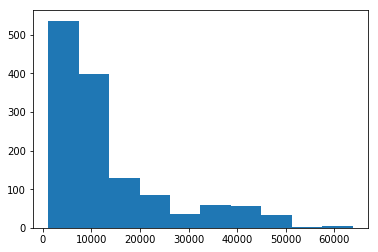

In [146]:
import matplotlib.pyplot as plt

plt.hist(df['charges'], bins=10)

# Question 3 - Explore the relationship between variables. 

You can use corr() function or any other function to do the same.

In [147]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


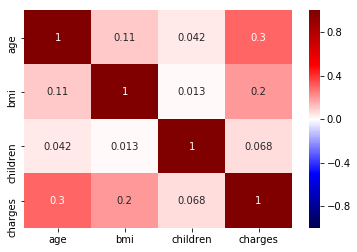

In [148]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

# Question 4 - Visualize the relationship among various variables/features. 

You can use pairplot function and create a scatterplot matrix to do so.

In [149]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


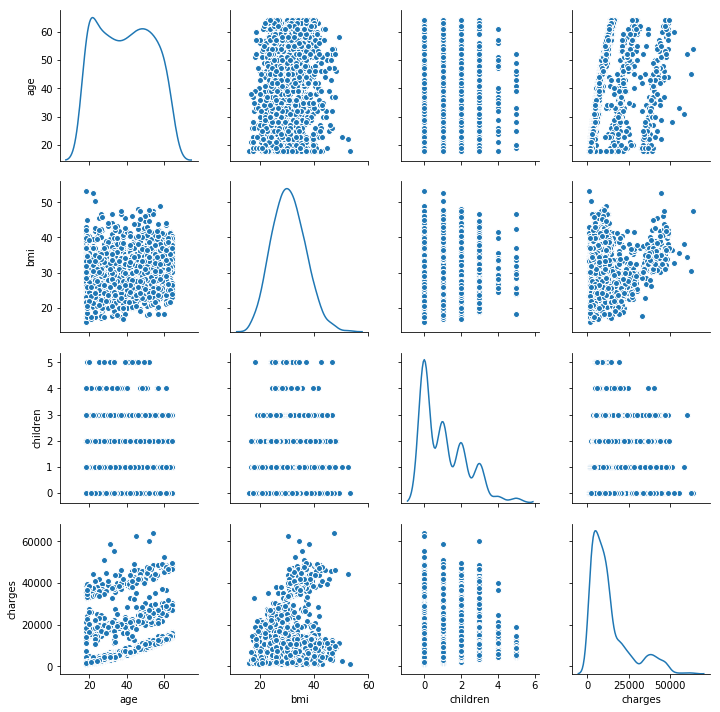

In [150]:
sns.pairplot(df[['age', 'sex', 'bmi', 
                      'children', 'smoker', 'region','charges' ]], diag_kind = 'kde')

# Question 5 - Get the train and test data from your dataset.

# Answer
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


# Question 6 - Create the dummies for the categorical variables/features.

You can use pd.get_dummies() function to do so.

In [151]:
Encoded=pd.get_dummies(data=df, columns=['sex', 'smoker','region'])
df1=Encoded.pop('charges')
#Encoded.pop('charges') # remove column b and store it in df1
Encoded['charges']=df1 # add b series as a 'new' column.
Encoded

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,1,0,0,1,0,0,0,1,16884.92400
1,18,33.770,1,0,1,1,0,0,0,1,0,1725.55230
2,28,33.000,3,0,1,1,0,0,0,1,0,4449.46200
3,33,22.705,0,0,1,1,0,0,1,0,0,21984.47061
4,32,28.880,0,0,1,1,0,0,1,0,0,3866.85520
5,31,25.740,0,1,0,1,0,0,0,1,0,3756.62160
6,46,33.440,1,1,0,1,0,0,0,1,0,8240.58960
7,37,27.740,3,1,0,1,0,0,1,0,0,7281.50560
8,37,29.830,2,0,1,1,0,1,0,0,0,6406.41070
9,60,25.840,0,1,0,1,0,0,1,0,0,28923.13692


# Question 7 - Train your model.

In [194]:
X = Encoded.iloc[:, 0:11].values
y = Encoded.iloc[:, 11].values

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()


# Question 8 - Fit your model and get the summary of model.

In [195]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Question 9 - Predict the charges and evaluate the model performance. 

In [197]:
y_pred=regressor.predict(X_test)
y_pred
#PREDICTED CHARGES BEFORE IMPROVING THE MODEL


array([ 9.01636753e+03,  7.01997635e+03,  3.68708343e+04,  9.51853774e+03,
        2.69740308e+04,  1.10808462e+04, -4.06177600e+01,  1.71922331e+04,
        9.74950536e+02,  1.13299594e+04,  2.80574861e+04,  9.47838799e+03,
        4.98095281e+03,  3.84564701e+04,  4.03433327e+04,  3.71038753e+04,
        1.51982019e+04,  3.57689693e+04,  8.88568387e+03,  3.13835989e+04,
        3.79641903e+03,  1.02628964e+04,  2.37593679e+03,  7.26280819e+03,
        1.12875675e+04,  1.31383480e+04,  1.46241614e+04,  6.07324604e+03,
        1.00361537e+04,  1.97927814e+03,  9.07103928e+03,  1.31369887e+04,
        4.30868680e+03,  3.21105955e+03,  4.48957162e+03,  1.33774493e+04,
        1.82221028e+03,  8.79191682e+03,  3.31981518e+04,  3.25005781e+04,
        3.76368816e+03,  4.35479656e+03,  1.42473276e+04,  1.15436019e+04,
        8.70433805e+03,  1.22401028e+04,  5.20831471e+03,  2.98293172e+03,
        3.54465532e+04,  9.10285846e+03,  1.57820945e+04,  2.13473894e+03,
        1.24668220e+04,  

# Evaluation of the model

In [209]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Evaluation of the model\n\n')
print('Mean Absolute Error is :', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error is :', mean_squared_error(y_test, y_pred, multioutput='uniform_average'))

RMS= np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error is :', RMS)


Evaluation of the model


Mean Absolute Error is : 4185.809142538226
Mean Squared Error is : 33608158.89773258
Root Mean Squared Error is : 5797.254427548663


# Checking the P-value for improving the prediction and results

In [201]:
import statsmodels.formula.api as sm
regressor=sm.OLS(endog=y, exog=X).fit()
print('Checking the Pvalue for improving the prediction and results')
regressor.summary()


Checking the Pvalue for improving the prediction and results


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sun, 16 Dec 2018   Prob (F-statistic):               0.00
Time:                        19:06:09   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           256.8564     11.899     21.587      0.000     233.514     280.199
x2           339.1935     28.599     11.860      0.000     283.088     395.298
x3           475.5005    137.804      3.451      0.001     205.163     745.838
x4          -201.1179    418.353     -0.481      0.631   -1021.823     619.587
x5          -332.4323    425.031     -0.782      0.434   -1166.237     501.372
x6         -1.219e+04    419.605    -29.054      0.000    -1.3e+04   -1.14e+04
x7          1.166e+04    457.738     25.468      0.000    1.08e+04    1.26e+04
x8           453.6217    332.155      1.366      0.172    -197.983    1105.226
x9           100.6578    333.891      0.301      0.763    -554.352     755.668
x10         -581.4004    381.765     -1.523      0.128   -1330.328     167.527
x11         -506.4293    351.178     -1.442      0.150   -1195.353     182.494
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                     8.21e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.21e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Removed variables with P-value >0.05 for improving the prediction and results

In [202]:

X_improved= X [:, [0,1,2,5,6,9,10]]
regressor=sm.OLS(endog=y, exog=X_improved).fit()
print('Removed variables with P-value >0.05 for improving the prediction and results')
regressor.summary()


Removed variables with P-value >0.05 for improving the prediction and results


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.3
Date:                Sun, 16 Dec 2018   Prob (F-statistic):               0.00
Time:                        19:06:47   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           257.0064     11.889     21.617      0.000     233.683     280.330
x2           338.6413     28.554     11.860      0.000     282.625     394.657
x3           471.5441    137.656      3.426      0.001     201.498     741.590
x4         -1.217e+04    949.538    -12.812      0.000    -1.4e+04   -1.03e+04
x5          1.168e+04    995.186     11.735      0.000    9726.188    1.36e+04
x6          -858.4696    415.206     -2.068      0.039   -1672.998     -43.941
x7          -782.7452    413.756     -1.892      0.059   -1594.430      28.940
==============================================================================
Omnibus:                      300.125   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.587
Skew:                           1.211   Prob(JB):                    2.48e-156
Kurtosis:                       5.643   Cond. No.                         416.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Using X_improved instead of X for splitting the data as per the identified variables

In [210]:
print('Using X_improved for Splitting the data as per the remaining variables \n' ) 

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_improved, y, test_size = 0.2, random_state = 42)

from sklearn.linear_model import LinearRegression
regressor_improved = LinearRegression()
regressor_improved.fit(X_train, y_train)

Using X_improved for Splitting the data as per the remaining variables 



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Predicting the charges using variables having P-Value <0.05

In [204]:
y_pred=regressor_improved.predict(X_test)
print('Predicting the charges using variables having P-Value <0.05')
y_pred


Predicting the charges using variables having P-Value <0.05


array([ 8776.0461126 ,  7249.95623089, 37043.88958736,  9647.45262122,
       27180.75175393, 10867.4187462 ,   357.32062482, 17095.79075347,
         910.11212682, 11409.31208265, 28115.65661127,  9571.43198897,
        5255.2351329 , 38419.7407473 , 40266.123739  , 37106.04000165,
       15221.08265209, 35905.77003011,  9103.20094164, 31650.16223206,
        3850.93380066, 10134.58895903,  2384.39403588,  6947.90183777,
       11474.28650395, 12768.54321972, 14497.08839515,  6334.34978299,
        9769.40877833,  2192.39423194,  9098.61689876, 13251.27109134,
        4555.108927  ,  3587.27039035,  4470.35033418, 12855.31751262,
        1974.32066074,  8803.03969275, 33457.08187781, 32599.12685851,
        3891.95265045,  4524.52666082, 14128.0338698 , 11622.41399797,
        8778.84401216, 12104.67366613,  5457.8540653 ,  3140.19401043,
       35501.6136514 ,  9153.81553395, 15823.92105165,  2355.89438858,
       12537.42024978,  1315.65147536, 13396.5445456 , 12394.68206288,
      

# Answer 9 Final Evaluation of the Model 

In [192]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error is :', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error is :', mean_squared_error(y_test, y_pred, multioutput='uniform_average'))

RMS= np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error is :', RMS)

Mean Absolute Error is : 4185.809142538226
Mean Squared Error is : 33608158.89773258
Root Mean Squared Error is : 5797.254427548663


You can get the values of MAE, MSE, RMSE to show the evaluation parameters of your model

# Question 10 - What are some ideas to improve your model performance? 

It is a subjective question, you are not expected to give code and output in this last question.
Just think of the ways which can be helpful in improving your model performance.

Improving the model performance
# Answer
1) We can improving the model performance by getting more data

2) Cleaning the data

3) Encoding the data

4) Transforming the data(example Log transform if data is skewed)

5) Removing highly correlated data, and using Variance Inflation Factor for reducing the problem of multicolinearity

6) Select only the important Features

In [ ]:
Encoded.head(0)

# EXTRA SOLUTION

# Solving the problem using another method as discussed in class ( Ordinary Least Squares )

# Kindly ignore if required



.

In [205]:
import statsmodels.formula.api as sm
m_linear_mod = sm.ols(formula = "charges ~ age+\
                      bmi+ children + sex_female + sex_male +\
                      smoker_no + smoker_yes + region_northeast +\
                      region_northwest + region_southeast + region_southwest",
                      data = Encoded).fit()
print('Checking the Pvalue for improving the prediction and results')
m_linear_mod.summary()

Checking the Pvalue for improving the prediction and results


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sun, 16 Dec 2018   Prob (F-statistic):               0.00
Time:                        19:15:27   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -296.4168    430.507     -0.689      0.491   -1140.964     548.130
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
children           475.5005    137.804      3.451      0.001     205.163     745.838
sex_female         -82.5512    269.226     -0.307      0.759    -610.706     445.604
sex_male          -213.8656    274.976     -0.778      0.437    -753.299     325.568
smoker_no        -1.207e+04    282.338    -42.759      0.000   -1.26e+04   -1.15e+04
smoker_yes        1.178e+04    313.530     37.560      0.000    1.12e+04    1.24e+04
region_northeast   512.9050    300.348      1.708      0.088     -76.303    1102.113
region_northwest   159.9411    301.334      0.531      0.596    -431.201     751.083
region_southeast  -522.1170    330.759     -1.579      0.115   -1170.983     126.749
region_southwest  -447.1459    310.933     -1.438      0.151   -1057.119     162.827
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                     6.40e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.59e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [206]:
import statsmodels.formula.api as sm
m_linear_mod = sm.ols(formula = "charges ~ age+\
                      bmi+ children +\
                      smoker_no + smoker_yes +\
                       region_southeast + region_southwest",
                      data = Encoded).fit()

print('Removed variables with P-value >0.05 for improving the prediction and results')
m_linear_mod.summary()

Removed variables with P-value >0.05 for improving the prediction and results


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.3
Date:                Sun, 16 Dec 2018   Prob (F-statistic):               0.00
Time:                        19:15:53   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -162.2966    633.734     -0.256      0.798   -1405.524    1080.930
age                257.0064     11.889     21.617      0.000     233.683     280.330
bmi                338.6413     28.554     11.860      0.000     282.625     394.657
children           471.5441    137.656      3.426      0.001     201.498     741.590
smoker_no          -1.2e+04    357.736    -33.553      0.000   -1.27e+04   -1.13e+04
smoker_yes        1.184e+04    396.946     29.830      0.000    1.11e+04    1.26e+04
region_southeast  -858.4696    415.206     -2.068      0.039   -1672.998     -43.941
region_southwest  -782.7452    413.756     -1.892      0.059   -1594.430      28.940
==============================================================================
Omnibus:                      300.125   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.587
Skew:                           1.211   Prob(JB):                    2.48e-156
Kurtosis:                       5.643   Cond. No.                     2.33e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.49e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [174]:
Encoded.corr()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
age,1.000000,0.109272,0.042469,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016,0.299008
bmi,0.109272,1.000000,0.012759,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205,0.198341
children,0.042469,0.012759,1.000000,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914,0.067998
sex_female,0.020856,-0.046371,-0.017163,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184,-0.057292
sex_male,-0.020856,0.046371,0.017163,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184,0.057292
smoker_no,0.025019,-0.003750,-0.007673,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945,-0.787251
smoker_yes,-0.025019,0.003750,0.007673,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945,0.787251
region_northeast,0.002475,-0.138156,-0.022808,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177,0.006349
region_northwest,-0.000407,-0.135996,0.024806,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829,-0.039905
region_southeast,-0.011642,0.270025,-0.023066,-0.017117,0.017117,-0.068498,0.068498,-0.345561,-0.346265,1.000000,-0.346265,0.073982


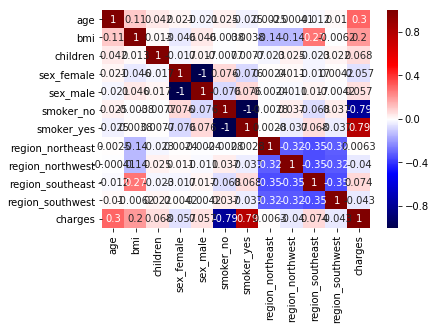

In [175]:
sns.heatmap(Encoded.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

In [207]:
predict = m_linear_mod.predict(Encoded[["age",
                                        "bmi",
                                        "children",
                                       "smoker_no",
                                       "smoker_yes",
                                       "region_southeast",
                                       "region_southwest"]])
    
result = pd.DataFrame()
result["Observed"] = Encoded["charges"] 
result["Expected"] = predict
print('Predicting the charges using variables having P-Value <0.05')
result

Predicting the charges using variables having P-Value <0.05


,Observed,Expected
0,16884.92400,25226.961928
1,1725.55230,3509.724971
2,4449.46200,6762.123339
3,21984.47061,4004.679959
4,3866.85520,5838.783811
5,3756.62160,3659.973987
6,8240.58960,10594.152268
7,7281.50560,8152.397076
8,6406.41070,8388.613321
9,28923.13692,12005.493091


In [208]:
from sklearn import metrics
print('Evaluation of the model\n\n')

print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(result["Observed"], result["Expected"])))
print("Mean Squared Error:", metrics.mean_squared_error(result["Observed"], result["Expected"]))
print('Mean Absolute Error is :', mean_absolute_error(result["Observed"], result["Expected"]))


Evaluation of the model


Root Mean Squared Error: 6043.275890932657
Mean Squared Error: 36521183.493927896
Mean Absolute Error is : 4176.076766022423
